<a href="https://colab.research.google.com/github/noahruiz416/Tempe_Traffic_Classification/blob/main/Tempe_Traffic_Prototype_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Notebook is the initial prototype for the Tempe Traffic Classification Project. Within this file you will find various sections that conduct exploratory analysis, feature selection, initial models and more. This specific notebook is the second version of the Original Prototype, with substanial changes

## Exploratory Data Analysis V.2

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
sns.set_style("darkgrid")

In [2]:
no_null_vals = pd.read_csv("no_null_vals_df.csv")
null_vals = pd.read_csv("null_vals_df.csv")

In [3]:
null_vals['Injuryseverity'].value_counts()

No Injury                    23349
Possible Injury               4921
Non Incapacitating Injury     4411
Incapacitating Injury          559
Suspected Minor Injury         223
Fatal                           78
Suspected Serious Injury        19
Name: Injuryseverity, dtype: int64

In [4]:
#counting how many nulls, tends to be quite a lot of missing values, which may be in apart to accidents involving one person
#this will be explored later through various approaches
null_vals.isnull().sum()

X                       138
Y                       138
OBJECTID                  0
Incidentid                0
DateTime                  0
Year                      0
StreetName               19
CrossStreet              41
Distance                  1
JunctionRelation          1
Totalinjuries             1
Totalfatalities           1
Injuryseverity            1
Collisionmanner           1
Lightcondition            1
Weather                   1
SurfaceCondition          1
Unittype_One              1
Age_Drv1                 29
Gender_Drv1             582
Traveldirection_One       1
Unitaction_One            1
Violation1_Drv1          29
AlcoholUse_Drv1          29
DrugUse_Drv1             29
Unittype_Two           2020
Age_Drv2               2842
Gender_Drv2            2913
Traveldirection_Two    2020
Unitaction_Two         2020
Violation1_Drv2        2842
AlcoholUse_Drv2        2842
DrugUse_Drv2           2842
Latitude                139
Longitude               139
dtype: int64

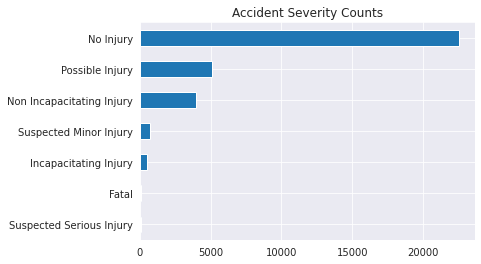

In [5]:
#distribution of y variable injruy severity for no null value data
no_null_vals['Injuryseverity'].value_counts().sort_values().plot.barh(title = 'Accident Severity Counts')

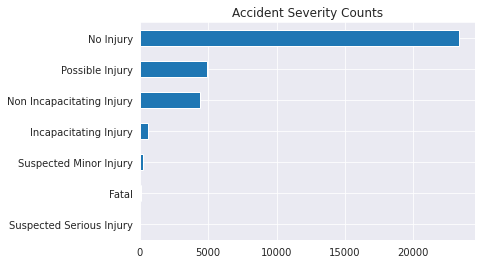

In [6]:
#distribution of injruy severity for null valued data, seems to be that the overlying distrubtion of classes remains the same
null_vals['Injuryseverity'].value_counts().sort_values().plot.barh(title = 'Accident Severity Counts')

In [7]:
#helper function to count fatal or non fatal counts, we will use this to compare distributions of values across datasets
#using this to check whether or not our assumption is naive
def count_fatal(data_frame, column_name, key_name):
  return_true = []
  return_false = []
  for classes in data_frame[column_name]:
    if classes != key_name: 
      return_false.append(classes)
    else:
      return_true.append(classes)
  values = {f"Matching '{key_name}' Values": len(return_true),
            f"Non Matching '{key_name}'' Values": len(return_false),
            "Percent of Matching - Non Matching": f"{round((len(return_true) / (len(return_false) + len(return_true))) * 100, 4)}%"}
  return values

In [8]:
#as shown in vizualizations the distribution of fatal vs non fatal injuries remains the same in either dataset
count_fatal(no_null_vals, 'Injuryseverity', 'Fatal')

{"Matching 'Fatal' Values": 69,
 "Non Matching 'Fatal'' Values": 32830,
 'Percent of Matching - Non Matching': '0.2097%'}

In [9]:
count_fatal(null_vals, 'Injuryseverity', 'Fatal')

{"Matching 'Fatal' Values": 78,
 "Non Matching 'Fatal'' Values": 33483,
 'Percent of Matching - Non Matching': '0.2324%'}

In [10]:
#exploring No Injury

In [11]:
count_fatal(no_null_vals, 'Injuryseverity', 'No Injury') #non null values

{"Matching 'No Injury' Values": 22537,
 "Non Matching 'No Injury'' Values": 10362,
 'Percent of Matching - Non Matching': '68.5036%'}

In [12]:
count_fatal(null_vals, 'Injuryseverity', 'No Injury') #null values

{"Matching 'No Injury' Values": 23349,
 "Non Matching 'No Injury'' Values": 10212,
 'Percent of Matching - Non Matching': '69.5718%'}

In [13]:
#Exploring Possible Injury

In [14]:
count_fatal(no_null_vals, 'Injuryseverity', 'Possible Injury') #non null values

{"Matching 'Possible Injury' Values": 5070,
 "Non Matching 'Possible Injury'' Values": 27829,
 'Percent of Matching - Non Matching': '15.4108%'}

In [15]:
count_fatal(null_vals, 'Injuryseverity', 'Possible Injury') #null values

{"Matching 'Possible Injury' Values": 4921,
 "Non Matching 'Possible Injury'' Values": 28640,
 'Percent of Matching - Non Matching': '14.6629%'}

In [16]:
#Exploring Non Incapacitating Injury
count_fatal(null_vals, 'Injuryseverity', 'Non Incapacitating Injury') #null values

{"Matching 'Non Incapacitating Injury' Values": 4411,
 "Non Matching 'Non Incapacitating Injury'' Values": 29150,
 'Percent of Matching - Non Matching': '13.1432%'}

In [17]:
count_fatal(no_null_vals, 'Injuryseverity', 'Non Incapacitating Injury') #no null values

{"Matching 'Non Incapacitating Injury' Values": 3991,
 "Non Matching 'Non Incapacitating Injury'' Values": 28908,
 'Percent of Matching - Non Matching': '12.1311%'}

### Based on this preliminary analysis one possible approach to nulls may be to fill in null values that are related to driver two with zeroes. From there we can drop any remaining nulls, in a way it would make sense, since in these cases their seems to only be one driver in the accident.

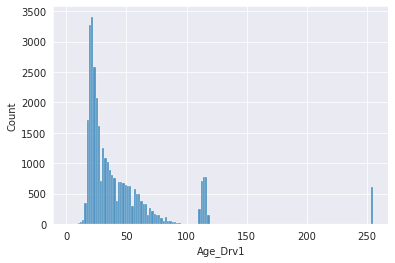

In [72]:
sns.histplot(data = null_vals, x = "Age_Drv1")

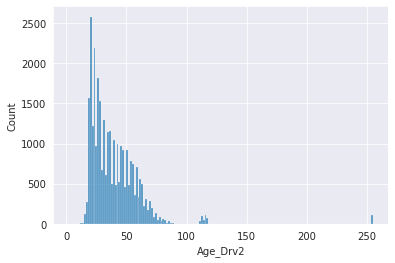

In [73]:
sns.histplot(data = null_vals, x = "Age_Drv2")

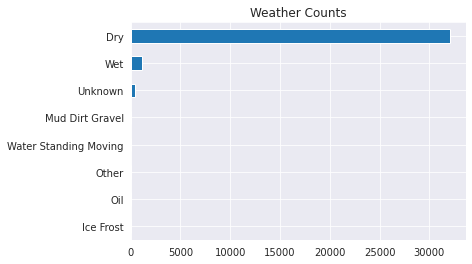

In [75]:
null_vals['SurfaceCondition'].value_counts().sort_values().plot.barh(title = 'Weather Counts')

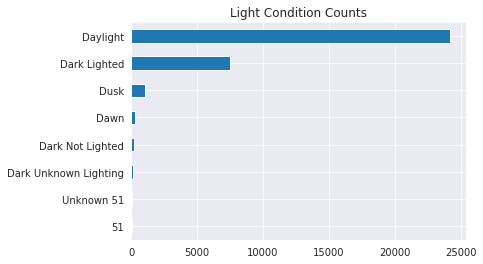

In [79]:
null_vals['Lightcondition'].value_counts().sort_values().plot.barh(title = 'Light Condition Counts')

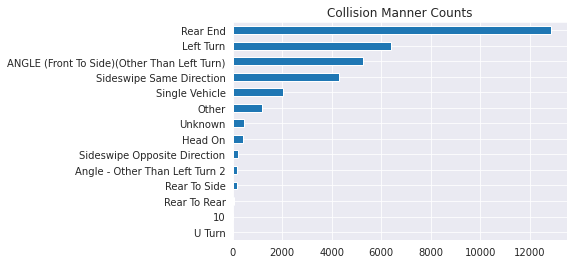

In [80]:
null_vals['Collisionmanner'].value_counts().sort_values().plot.barh(title = 'Collision Manner Counts')

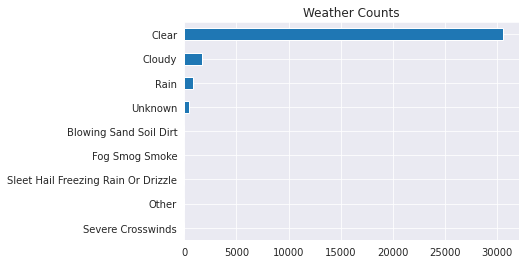

In [81]:
null_vals['Weather'].value_counts().sort_values().plot.barh(title = 'Weather Counts')

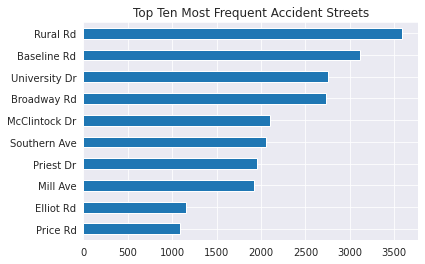

In [85]:
null_vals['StreetName'].value_counts().head(10).sort_values().plot.barh(title = 'Top Ten Most Frequent Accident Streets')

In [271]:
#fatal aggregation
streets_fatal = null_vals[['StreetName', 'Totalfatalities']].groupby('StreetName').sum()
streets_non_fatal = null_vals[['StreetName', 'Incidentid']].groupby('StreetName').count()
fatal_by_year = null_vals[['Year', 'StreetName', 'Totalfatalities']].groupby('Year').sum()
non_fatal_year = null_vals[['Year', 'StreetName', 'Incidentid']].groupby('Year').count()

In [272]:
#conditions aggregation
light_conditions = null_vals[['Lightcondition', 'Totalfatalities']].groupby('Lightcondition').sum()
weather_conditions = null_vals[['Weather', 'Totalfatalities']].groupby('Weather').sum()
surface_conditions = null_vals[['SurfaceCondition', 'Totalfatalities']].groupby('SurfaceCondition').sum()
collision_conditions = null_vals[['Collisionmanner', 'Totalfatalities']].groupby('Collisionmanner').sum()

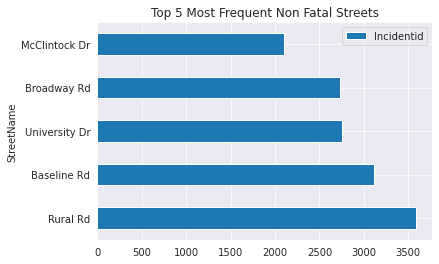

In [273]:
streets_non_fatal.sort_values(by = 'Incidentid', ascending = False).head(5).plot.barh(title = 'Top 5 Most Frequent Non Fatal Streets')

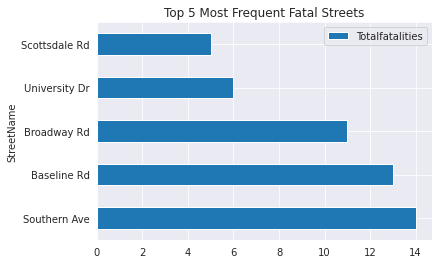

In [274]:
streets_fatal.sort_values(by = 'Totalfatalities', ascending = False).head(5).plot.barh(title = 'Top 5 Most Frequent Fatal Streets')

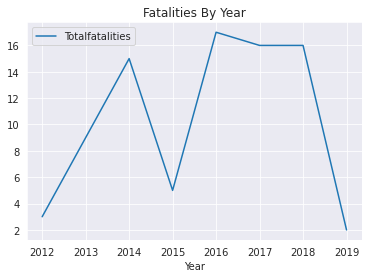

In [231]:
fatal_by_year.sort_values(by = 'Year', ascending = False).plot(title = 'Fatalities By Year')

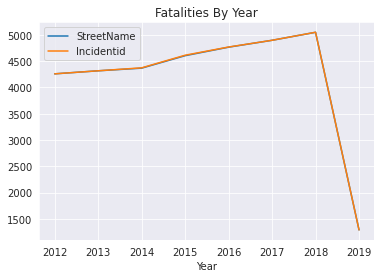

In [233]:
non_fatal_year.sort_values(by = 'Year').plot(title = 'Fatalities By Year')